# Part1 #

## 1.1 Introduction ##

This work proposes an innovative algorithm SCC (Shuffle Combine Climber) to efficiently solve the classic Knapsack Problem. The Knapsack Problem is an important challenge in the field of combinatorial optimization, which involves how to maximize the value of items under capacity constraints and is widely used in practical scenarios such as logistics optimization and resource allocation.

SCC improves the limitations of traditional hill climbing algorithms by introducing "shuffle" and "combine" strategies, and balances local exploration and global optimization capabilities in the search process. The core idea of ​​the algorithm is to use randomness and diversity to enhance the quality of the initial solution, and quickly converge to a high-quality solution through an efficient hill climbing mechanism.

## 1.2 Algorithm comparison experiment ##

To verify the effectiveness of SCC, this paper compares it with two classic algorithms, including:
Traditional hill climbing algorithm (T): This is a simple algorithm based on neighborhood search, which runs fast but easily falls into local optimal solutions.
Genetic algorithm (G): It simulates the biological evolution process to perform global search and has a strong ability to jump out of local optimal solutions, but at the cost of higher computational complexity.

## 1.3 Result evaluation and analysis

The experiment tested the performance of SCC, T and G through multiple data sets, and statistically analyzed the experimental results with the help of Minitab tools to ensure the accuracy and reliability of the data. The main conclusions are as follows:

Solution quality: SCC's solution quality is better than T and G overall, especially in instances with higher complexity.
Computational efficiency: SCC's running time is much faster than T and G, reflecting its significant advantage in efficiency.
Stability: Although SCC has slight fluctuations in solution stability compared to G, it has better overall results, especially in the frequency and distribution of high-quality solutions.

## 1.4 Disclaimer ##

The algorithm design and experimental results of this article are independently completed by the author based on personal learning and practice. However, as a beginner, the author's programming ability and algorithm implementation may not be perfect, there may be potential problems in the code, and the experimental results may also be affected by implementation details. In addition, the experimental background of this article is based on a limited number of data sets, and the performance of the algorithm can only reflect the effect under these specific conditions, and is not guaranteed to be applicable to data sets of all sizes or complexities. Therefore, the conclusions of this article are for reference only, and further discussion and improvement are welcome.

# Part2  #


## 2.1 Initial algorithm implementation and parameter adjustment ##

### 2.11 Traditional hill climbing algorithm(T)

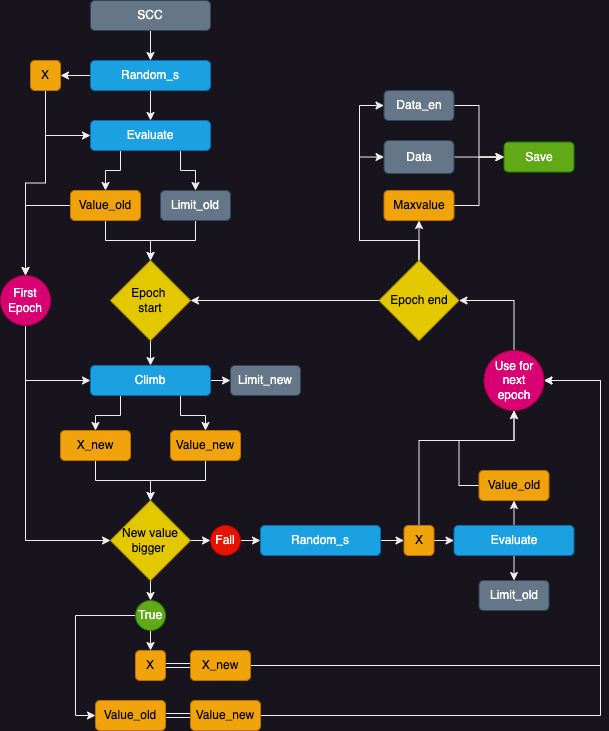

In [1]:
import math 
import numpy as np
import pandas as pd
import random
import csv
import matplotlib.pyplot as plt

In [2]:
def random_s(x1,x2,l):
    #function set for random number that could change numbers and weight
    sol = random.choices([0,1],weights=[x1,x2],k = l)
    return sol


In [3]:
def encode(list):
    #function convert binary to decimal
    lent = len(list)
    i = 0
    x = 0
    while i < lent:
        x1 = list[i]
        y1 = 10 ** i
        #print(y1)
        x = x + x1 * y1
        i = i + 1    
    xi = str(x)
    xi = int(xi, 2)
    return xi ,lent

In [4]:
def decode(xi,lent):
    #function convert decimal to binary
    xl = []
    x1 = bin(xi)[2:]  
    x2 = int(x1)
    i = 0
    for digit in str(x2):
        xl.append(int(digit))
    lenti = len(xl)
    while lenti < lent:
        xl.insert(0,0)
        lenti = len(xl)
    xl.reverse()
    return xl

In [5]:
def sight(x,learning_rate):
    #function that found numbers nearby
    step = int(x * learning_rate)
    x_min = x - step
    x_max = x + step
    return x_min , x_max

In [6]:
def read_multi_knapsack(fname):
    """
    Reads the data of a multi-knapsack instance

    :param fname: file name with instance data
    :return: n, m, p, r and b (as described above)
    """ 
    profits = []
    with open(fname, 'r') as kfile:
        lines = kfile.readlines()
        
    # convert m,n  to integer varaibles   
    n, m  = [int(d) for d in lines[0].split()]   # convert string data to integers
        
    input_line_cnt = 1    # input lines index after first line
    p = np.empty(0, dtype=np.int64)
    while p.size < n:
        d = np.loadtxt(lines[input_line_cnt].split(),
                       delimiter=" ", dtype=np.int64)
        p = np.append(p, d)
        input_line_cnt += 1

    r = np.empty((0, n), dtype=np.int64)
    for i in range(m):
        lin = np.empty(0, dtype=np.int64)
        while lin.size < n:
            d = np.loadtxt(lines[input_line_cnt].split(),
                           delimiter=" ", dtype=np.int64)
            lin = np.append(lin, d)
            input_line_cnt += 1
        r = np.vstack((r, lin))

    # get the capacities (max of one line space separated integer values)
    b = np.loadtxt(lines[input_line_cnt].split(),
                     delimiter=" ", dtype=np.int64)

    return  n, m, p, r, b, 

In [7]:
def calculate_value(profit,x,m):
    i = 0
    end = 0
    #value_f = []
    
    total_v = sum([x[i] * profit[i] for i in range(n)])
        
    
    
    return total_v
        
        

In [8]:
def limit_set(lim,x,m,length):
    # print("enter limit success")
    i = 0
    end = 0
    limit_f = []
    while i < m:
        limit = lim[i]
        # print(limit[i])
        total_l = sum([x[i] * limit[i] for i in range(n)])
        limit_f.append(total_l)
        i += 1
        # print("in limit n is ",n)
    # print("out limit success")
    
    
    return limit_f

In [9]:
def evaluate(x,res,profit,m,length):
    end = 0
    i = 0
    limit = limit_set(res,x,m,length)
    while i < m:
        detect = limit[i]
        if detect > cap[i]:
            end += 1
        i += 1
    
    if end < 1:
        values = calculate_value(profit,x,1)
    else :
        values = 0
         
    #print(limit)
    # print(values)
    # print(end)
    return limit,values

In [10]:
def climb(x,res,profit,m,learning_rate,length):
    limit_a,value_a = evaluate(x,res,profit,m,length)
    x,lengt = encode(x)
    x_b,x_c = sight(x,learning_rate)
    
    x_b = decode(x_b,lengt)
    x_c = decode(x_c,lengt)
    limit_b,value_b = evaluate(x_b,res,profit,m,lengt)
    limit_c,value_c = evaluate(x_c,res,profit,m,lengt)
    # print(value_b)
    # print(value_c)
    if value_b > value_c:
        x_t = x_b
    else :
        x_t = x_c
    limit_t,value_t = evaluate(x_t,res,profit,m,lengt)
    return x_t,limit_t,value_t

In [11]:
def climber(x1,x2,res,profit,m,learning_rate,length,epoch):
    i = 0
    x = random_s(x1,x2,length)
    limit_old,value_old = evaluate(x,res,profit,m,length)
    data = []
    data_en = []
    data_e = encode(x)[0]
    data.append(value_old)
    data_en.append(data_e)
    # print(value_old)
    while i < epoch:
        # print("enter success")
        x_new,limit_new,value_new = climb(x,res,profit,m,learning_rate,length)
        #value = value[0]
        #value_old = value_old[0]
        # print(value_old)
        if value_new >= value_old:
            # print("enter part 1 success")
            x = x_new 
            data_e = encode(x)[0]
            value_t = value_new
            data.append(value_t)
            data_en.append(data_e)
            # print("out part 1 success")
            # print(x)
            # print(value_t)
        else :
            # print("enter part 2 success")
            x = random_s(x1,x2,length)
            limit_old,value_old = evaluate(x,res,profit,m,length)
            data_e = encode(x)[0]
            data.append(value_old)
            data_en.append(data_e)
            # print("out part 2 success")
            # print(limit_old)
            # print(value_old)
        i += 1
    #print(data)
    maxvalue = max(data)
    return data,data_en,maxvalue

In [12]:
data_file_name = "multi_knap_n200_m25.txt"        

n, m, profits, res, cap = read_multi_knapsack(data_file_name)

print("Instance Data:")
print(f"n: {n}.  m: {m}")
print(f"Profits: {profits}")
print(f"Resources: {res}")
print(f"Capacities: {cap}")




Instance Data:
n: 200.  m: 25
Profits: [ 51  79  73  70  53  53  51  84  72  68  89  65  62  96  76  78  94  63
  82  61  66  55  60  63  50  63  91  65  64  55  80  74  95  96  56  90
  91  60  59  68  80  82 100  70  52  79  62  51  78  95  56  81  75  50
  80  84  83  92  54  72  57  87  84  53  94  75  79  63  84  57  60  92
  92  60  53  72  82  69  84  88  58  70  85  82  55  60  93  87  95  81
  67  53  65  76  69  92  71  76  76  61  75  70  91  95  60  70  50  91
  65  60  98  55  84  75  84  94  63  98  78  64  85  53  79  65  66  99
  77  75  78  71  90  56  98  65  75  85  90  54  68  54  65  95  83  64
  87  63  79  83  70  61  80  51  93  55  62  63  83 100  75  55  91  53
  79  71  61  91  76  50  93  89  57  77  60  60  54  93  53  70  69  74
  84  82  75  90  66  70  95  91 100  98  51  71  54  87  67  73  65  80
  74  56]
Resources: [[ 9  8 11 ... 13 14  6]
 [ 9  8 15 ...  9 15 11]
 [ 5  8 12 ...  8 11  6]
 ...
 [ 8 14  9 ... 10 13  7]
 [ 6 11  9 ... 14  9  8]
 [ 6  8

In [13]:
value,location,max_value = climber(50,50,res,profits,m,0.0001,n,100)

In [14]:
print(value)

[0, 6888, 0, 6784, 6828, 0, 6850, 6799, 7031, 0, 6843, 0, 6785, 0, 6764, 0, 6574, 7121, 6997, 6956, 6757, 6970, 6723, 6722, 6779, 6724, 7008, 6489, 6916, 6979, 7075, 7079, 0, 7065, 7073, 0, 6874, 0, 0, 6951, 0, 6974, 7004, 7092, 7029, 6871, 6869, 0, 6987, 6784, 6684, 7031, 0, 0, 7037, 7112, 6832, 6899, 7055, 7010, 0, 0, 6891, 6907, 6493, 7171, 0, 0, 6868, 6834, 7003, 6983, 7086, 7098, 7007, 6880, 0, 7150, 0, 6993, 6986, 0, 0, 0, 7083, 7057, 0, 6994, 7080, 6680, 6938, 0, 7071, 6951, 0, 6836, 7077, 0, 0, 0, 7132]


In [16]:
# print(location)

In [17]:
print(max_value)

7171


The following is the code used for parameter adjustment. If you are interested, you can experience it by unpacking the comments.

In [18]:
# i = 0
# # x1,x2,res,profit,m,learning_rate,length,epoch
# while i < 100:
#     data,endata,max_value = climber(60,40,res,profits,m,0.001,n,1000)
#     print(max_value)
#     i += 1

### 2.12 Traditional hill climbing algorithm(T) parameter adjustment

In the previous section, we implemented a mountain climber algorithm (hereafter referred to as algorithm T, meaning traditional) to solve a lightweight bin packing problem. In the following section, we will use data n200, so we first need to re-adjust the parameters of algorithm T to ensure a fair comparison with other algorithms. In order to evaluate each coefficient and the reason for selection, each parameter adjustment was run 100 times to ensure that the evaluation is fair and effective, and Minitab was used as the evaluation evidence.

The first step is to adjust the learning rate. Several commonly used values ​​are selected, including 0.01, 0.001, 0.0001, 0.05 and 0.005. At the same time, other parameters are kept fixed to the default values ​​such as 01 weight 50, epoch 100 to perform the control variable method test. This test method can clearly reflect the changes in the modified parameters. The evaluation results of the learning rate are as follows:

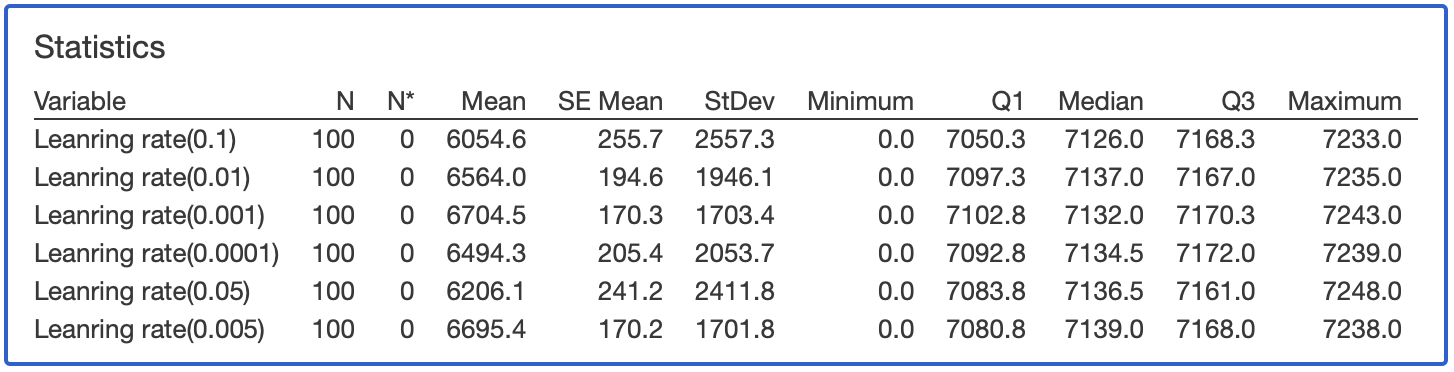

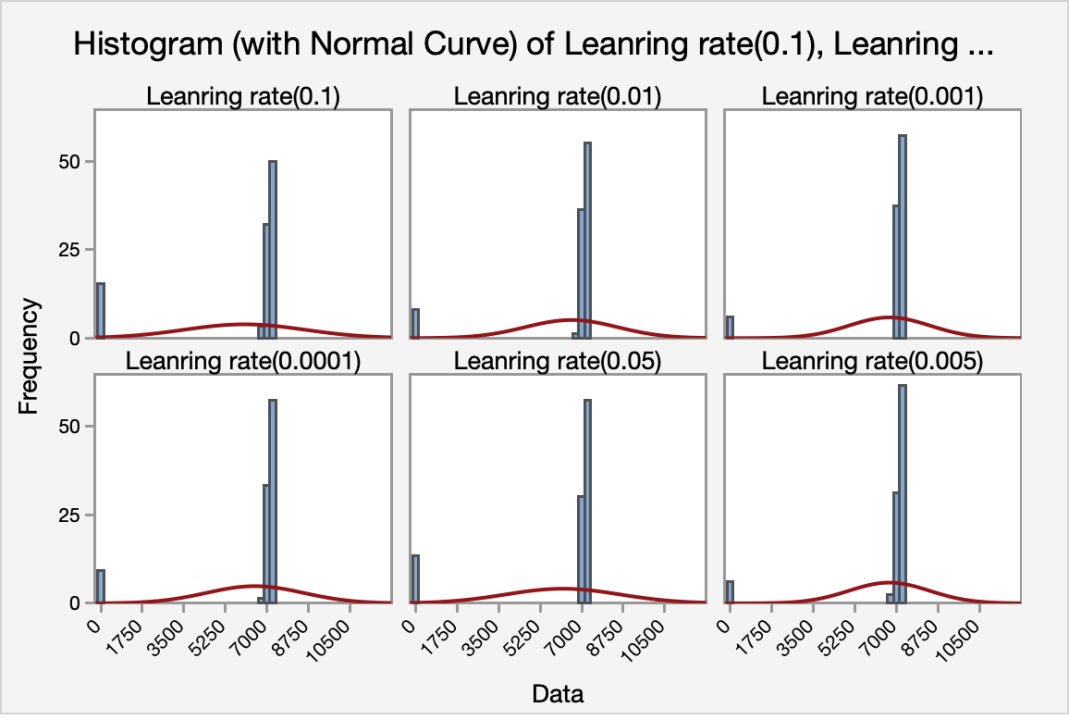

We can clearly see from the histogram that most of the values ​​are around 7000, and some of the values ​​are 0. This is because the backpack is stretched when the weight ratio is 50-50 (that is, the resources of the items exceed the capacities). Other parts are very similar. Next, we look at the statistics results and find that our mean value is the best when 0.001. At the same time, Q1, Q2 and Q3 are not significantly smaller than other values, and the maximum value is also relatively good, so in this test we keep the learning rate of 0.001.

The second step is to test the 01 weight by the control variable method while retaining the previous results. The parameters used are changed from 10-90 to 90-10, so as to find the local optimal weight. The results are as follows:

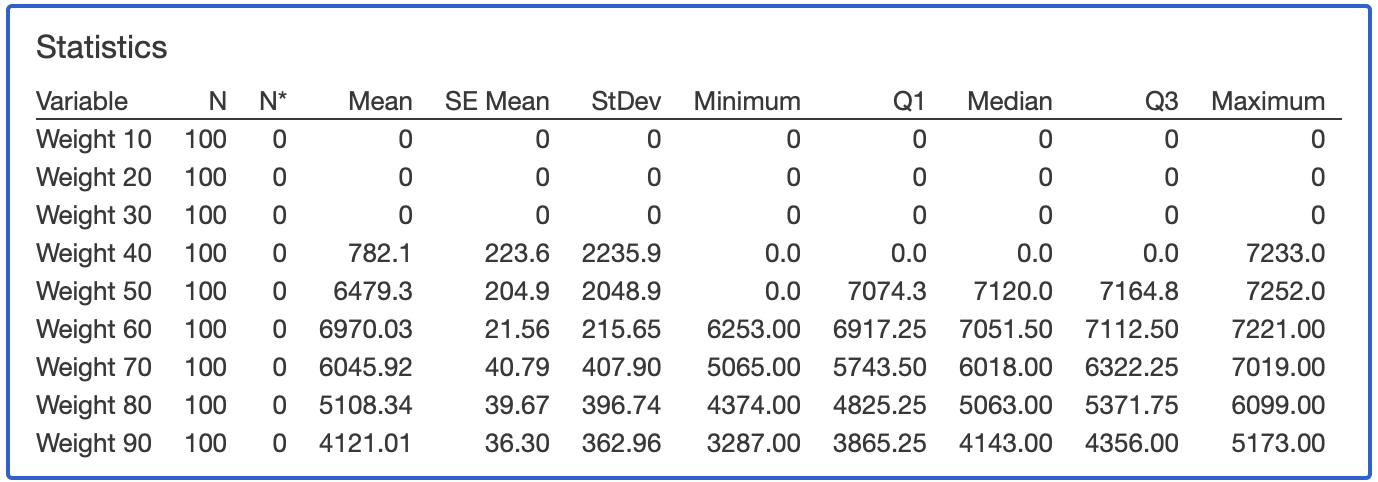

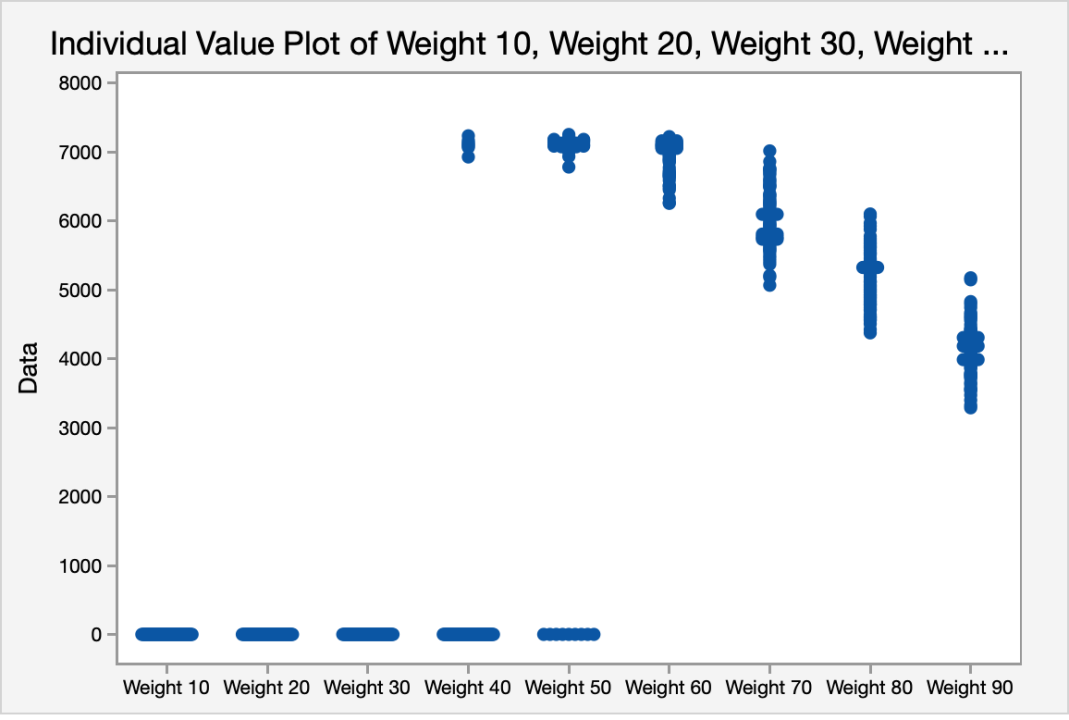

First, we can see from the individual value plot that there are a lot of 0s in the data of 10, 20, and 30, indicating that the backpack will almost certainly not be able to accommodate the data when the weights are at these values. Then, at 40, the number of 0s begins to decrease, indicating that the probability of the backpack not being able to accommodate the data begins to decrease. From 60 onwards, although the backpack is not unable to accommodate the data, the value begins to decrease gradually. After that, we observe the data in the statistics and find that the mean value is the largest when the weight is 60, and the mean values ​​of 70, 80, and 90 begin to decrease, which also verifies our previous guess, so in this step we retain the result of weight 60.

The third step is to adjust the epoch based on the previous situation to observe the change in the backpack value from 100 to 1000 epochs. The results are as follows:

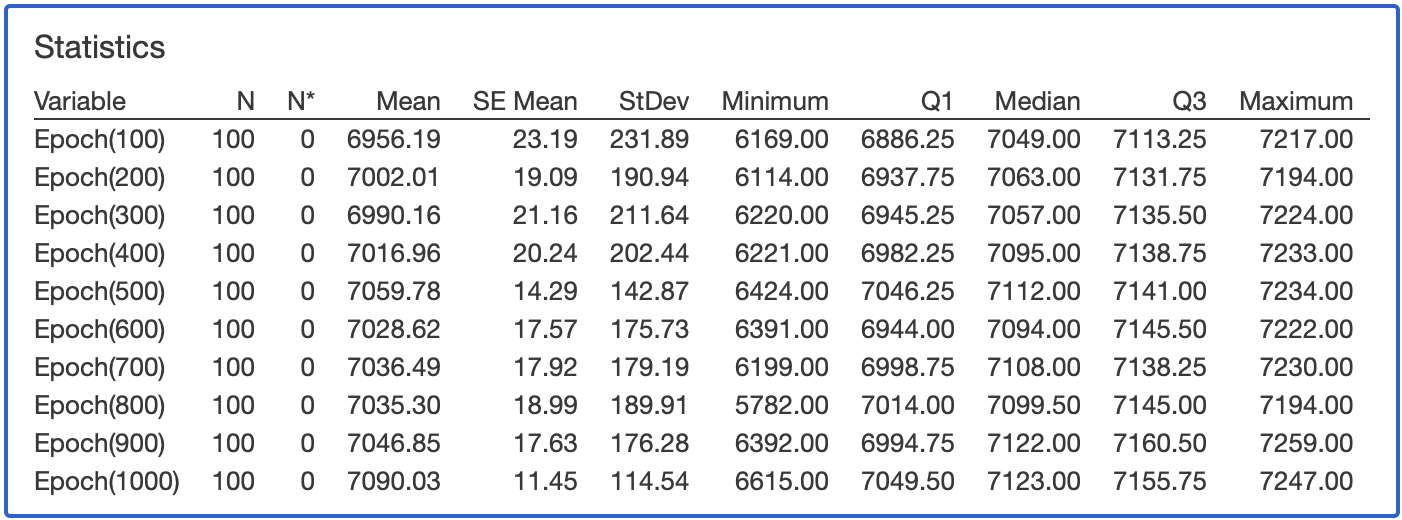

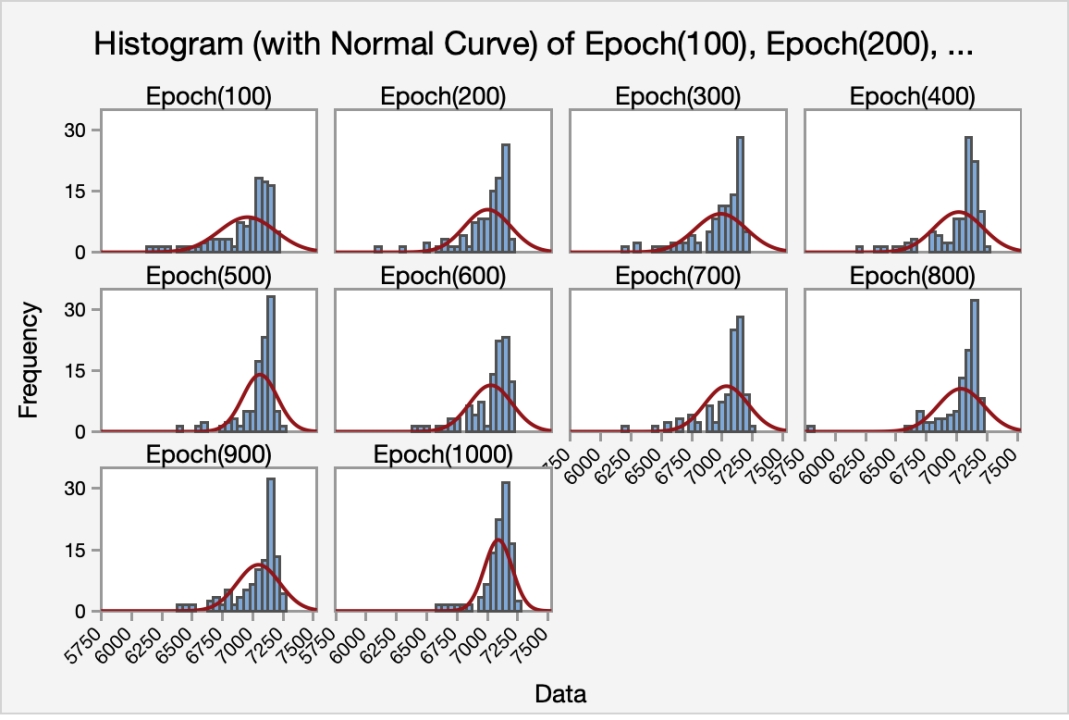

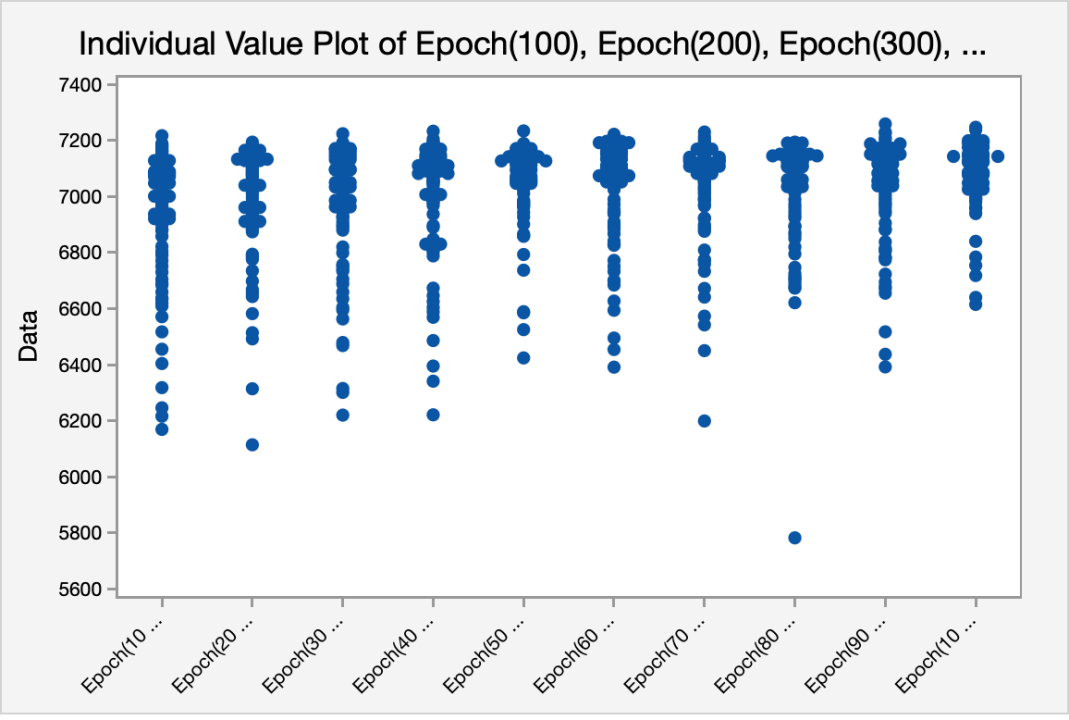

First, we can see from the scatter plot that this algorithm has a head-heavy but tail-heavy situation. The front values ​​are relatively concentrated, mainly between 7000 and 7200, but a small amount of data is scattered outside. Then we observe the bar chart and see that the peak part almost changes significantly with each epoch, but the tailing phenomenon still exists. Then observe the data in statistics and find that our average value changes from 6956.19 to 7090.03, which is a relatively obvious change. Then we retain all the values ​​of epoch 1000 for comparison with subsequent algorithms.

## 2.2 New algorithm design, parameter adjustment and comparison ##

### 2.21 SCC algorithm implementation and parameter adjustment ###

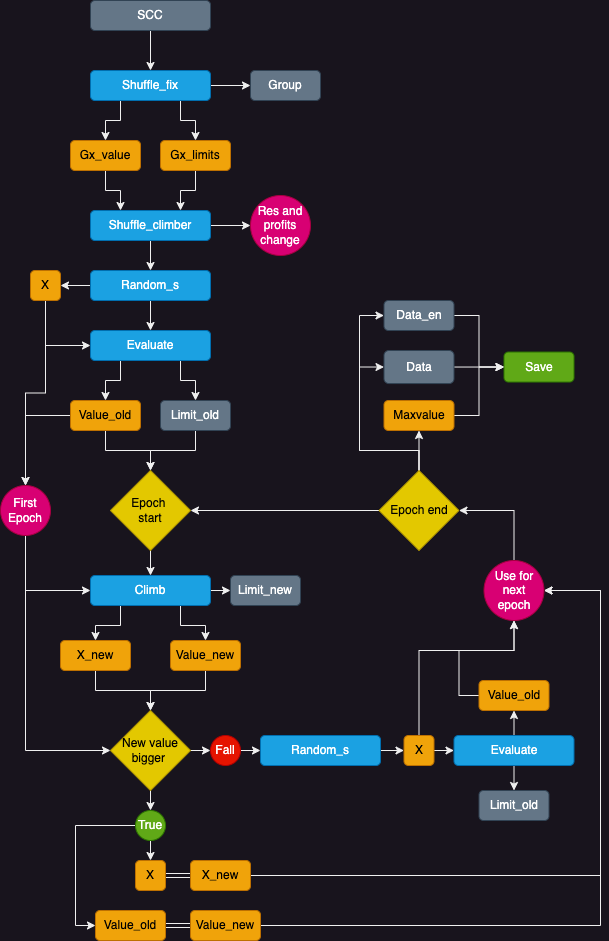

This part mainly uses the hill climber as the origin and adds new parts to complete the algorithm Shuffle combine climber (hereinafter referred to as SCC). For ease of understanding, you can refer to the framework diagram above. First, start with shuffle fix. The purpose of this equation is to shuffle the original resources and profits in the same way. This method does not affect the corresponding relationship between profits and res of each item. Then, the items are bundled together in order according to the number of samples, which is the origin of the name shuffle combine. After that, we will get Gx_value and Gx_limits, which are the new profits and res. The biggest advantage of this method is that it greatly reduces the scale of randomness. Then the rest of the part is almost the same as the previous climber. It is worth mentioning that in this algorithm, if the surrounding adjacent values ​​are not greater than themselves, they will be re-randomized.

In [1]:
import math 
import numpy as np
import pandas as pd
import random
import csv
import matplotlib.pyplot as plt

The purpose of the Random_s function is to give randomness weight, that is, 01 weight.

In [2]:
def random_s(x1,x2,l):
    #function set for random number that could change numbers and weight
    sol = random.choices([0,1],weights=[x1,x2],k = l)
    return sol



Afterwards, I set up the encode function to convert an array of 0s and 1s into a decimal integer, so that I can use the learning rate to make further parameter adjustments. At the same time, in order to make the result work properly, I set up a decode function to convert the decimal number into an array of 01 of the same length. The sight function is the function of the learning rate, and its purpose is to find two adjacent points. It is worth noting that if the point found is out of range, the value will be directly changed to 0 in subsequent operations, causing the point to be actively rejected, so there is no need to worry about errors caused by out of range.

In [3]:
def encode(list):
    #function convert binary to decimal
    lent = len(list)
    i = 0
    x = 0
    while i < lent:
        x1 = list[i]
        y1 = 10 ** i
        #print(y1)
        x = x + x1 * y1
        i = i + 1    
    xi = str(x)
    xi = int(xi, 2)
    return xi ,lent

In [4]:
def decode(xi,lent):
    #function convert decimal to binary
    xl = []
    x1 = bin(xi)[2:]  
    x2 = int(x1)
    i = 0
    for digit in str(x2):
        xl.append(int(digit))
    lenti = len(xl)
    while lenti < lent:
        xl.insert(0,0)
        lenti = len(xl)
    xl.reverse()
    return xl

In [5]:
def sight(x,learning_rate):
    #function that found numbers nearby
    step = int(x * learning_rate)
    x_min = x - step
    x_max = x + step
    return x_min , x_max

The read_multi_knapsack function is used to extract data from a txt file.

In [6]:
def read_multi_knapsack(fname):
    """
    Reads the data of a multi-knapsack instance

    :param fname: file name with instance data
    :return: n, m, p, r and b (as described above)
    """ 
    profits = []
    with open(fname, 'r') as kfile:
        lines = kfile.readlines()
        
    # convert m,n  to integer varaibles   
    n, m  = [int(d) for d in lines[0].split()]   # convert string data to integers
        
    input_line_cnt = 1    # input lines index after first line
    p = np.empty(0, dtype=np.int64)
    while p.size < n:
        d = np.loadtxt(lines[input_line_cnt].split(),
                       delimiter=" ", dtype=np.int64)
        p = np.append(p, d)
        input_line_cnt += 1

    r = np.empty((0, n), dtype=np.int64)
    for i in range(m):
        lin = np.empty(0, dtype=np.int64)
        while lin.size < n:
            d = np.loadtxt(lines[input_line_cnt].split(),
                           delimiter=" ", dtype=np.int64)
            lin = np.append(lin, d)
            input_line_cnt += 1
        r = np.vstack((r, lin))

    # get the capacities (max of one line space separated integer values)
    b = np.loadtxt(lines[input_line_cnt].split(),
                     delimiter=" ", dtype=np.int64)

    return  n, m, p, r, b, 

The calculate_value function is used to calculate the total value of all items in the backpack, the limit_set function is used to calculate the sum of the res of all items in the backpack, and the evaluate function integrates the functions of the previous two functions, and also adds a function to determine whether the backpack can't accommodate the items. If it can't accommodate the items, the final value will become 0.

In [7]:
def calculate_value(profit,x,m):
    i = 0
    end = 0
    #value_f = []
    
    total_v = sum([x[i] * profit[i] for i in range(n)])
        
    
    
    return total_v
        
        

In [8]:
def limit_set(lim,x,m,length):
    # print("enter limit success")
    i = 0
    end = 0
    limit_f = []
    while i < m:
        limit = lim[i]
        # print(limit[i])
        total_l = sum([x[i] * limit[i] for i in range(n)])
        limit_f.append(total_l)
        i += 1
        # print("in limit n is ",n)
    # print("out limit success")
    
    
    return limit_f

In [9]:
def evaluate(x,res,profit,m,length):
    end = 0
    i = 0
    limit = limit_set(res,x,m,length)
    while i < m:
        detect = limit[i]
        if detect > cap[i]:
            end += 1
        i += 1
    
    if end < 1:
        values = calculate_value(profit,x,1)
    else :
        values = 0
         
    #print(limit)
    # print(values)
    # print(end)
    return limit,values

The climb function is used to implement the hill climbing function, and climber is a verification algorithm before SCC.

In [10]:
def climb(x,res,profit,m,learning_rate,length):
    limit_a,value_a = evaluate(x,res,profit,m,length)
    x,lengt = encode(x)
    x_b,x_c = sight(x,learning_rate)
    
    x_b = decode(x_b,lengt)
    x_c = decode(x_c,lengt)
    limit_b,value_b = evaluate(x_b,res,profit,m,lengt)
    limit_c,value_c = evaluate(x_c,res,profit,m,lengt)
    # print(value_b)
    # print(value_c)
    if value_b > value_c:
        x_t = x_b
    else :
        x_t = x_c
    limit_t,value_t = evaluate(x_t,res,profit,m,lengt)
    return x_t,limit_t,value_t

In [11]:
def climber(x1,x2,res,profit,m,learning_rate,length,epoch):
    i = 0
    x = random_s(x1,x2,length)
    limit_old,value_old = evaluate(x,res,profit,m,length)
    data = []
    data_en = []
    data_e = encode(x)[0]
    data.append(value_old)
    data_en.append(data_e)
    # print(value_old)
    while i < epoch:
        # print("enter success")
        x_new,limit_new,value_new = climb(x,res,profit,m,learning_rate,length)
        #value = value[0]
        #value_old = value_old[0]
        # print(value_old)
        if value_new >= value_old:
            # print("enter part 1 success")
            x = x_new 
            data_e = encode(x)[0]
            value_t = value_new
            data.append(value_t)
            data_en.append(data_e)
            # print("out part 1 success")
            # print(x)
            # print(value_t)
        else :
            # print("enter part 2 success")
            x = random_s(x1,x2,length)
            limit_old,value_old = evaluate(x,res,profit,m,length)
            data_e = encode(x)[0]
            data.append(value_old)
            data_en.append(data_e)
            # print("out part 2 success")
            # print(limit_old)
            # print(value_old)
        i += 1
    #print(data)
    maxvalue = max(data)
    return data,data_en,maxvalue

Shuffle was the function designed at the beginning and was the first draft of the official version. It was rejected because it could only be used in the n28 dataset and did not have sufficient adaptability. However, the shuffle_fix function was designed based on it, which has better adaptability and can be used in n200, so it replaced the shuffle function.

In [12]:
def shuffle(length,sample,profit,limit):
    Group = pd.DataFrame()
    Group['value'] = profit
    Group['limit1'] = limit[0]
    Group['limit2'] = limit[1]
    Group = Group.sample(frac=1)
    
    S_value = []
    S_limit1 = []
    S_limit2 = []
    i = 0
    
    
    while i<length:
        x = Group.iloc[i][0]
        S_value.append(x)
        y = Group.iloc[i][1]
        S_limit1.append(y)
        z = Group.iloc[i][2]
        S_limit2.append(z)
        i += 1
        
    step = length/sample
    times = 0
    r = 0
    Gx , Gx2 , Gx3 = [] , [] , []
    Gv = 0
    Gl1 = 0
    Gl2 = 0
    
    while times<step:
        s = 0
        
        while s< sample:
            h = s + r
            Gv = S_value[h] + Gv
            Gl1 = S_limit1[h] + Gl1
            Gl2 = S_limit2[h] + Gl2
            s += 1
            # print(h)
        r = s + r
        # print(h)
        Gx.append(Gv)
        Gx2.append(Gl1)
        Gx3.append(Gl2)
        Gxt = []
        Gxt.append(Gx2)
        Gxt.append(Gx3)
        Gv = 0
        Gl1 = 0
        Gl2 = 0
        times += 1
    
    #print(Gx)
    return Gx,Gxt
    

In [13]:
def shuffle_fix(length, sample, profit, limits):
    
    num_limits = len(limits)
    Group = pd.DataFrame({'value': profit})
    for i in range(num_limits):
        Group[f'limit{i+1}'] = limits[i]
    Group = Group.sample(frac=1).reset_index(drop=True)
    
    S_value = Group['value'].values[:length]
    S_limits = [Group[f'limit{i+1}'].values[:length] for i in range(num_limits)]
    
    step = length // sample
    Gx = []
    Gx_limits = [[] for _ in range(num_limits)]

    for times in range(step):
        start_idx = times * sample
        end_idx = start_idx + sample
        
        Gv = S_value[start_idx:end_idx].sum()
        Gx.append(Gv)

        for i in range(num_limits):
            Gx_limits[i].append(S_limits[i][start_idx:end_idx].sum())

    Gx = np.array(Gx)
    Gx_rf = Gx.flatten()
    
    Gx_flat = np.array([item for sublist in Gx_limits for item in sublist])

    # 根据 res 的列数重塑，假设这里为20列 / Reshape according to the number of columns in res, assuming there are 20 columns here
    num_cols = 20  
    Gx_limits = Gx_flat.reshape(-1, num_cols)
    return Gx, Gx_limits , Group



climber_shuffle is an important part of the SCC algorithm. Its main purpose is to implement the climber function.

In [14]:
def climber_shuffle(x1,x2,res,profit,m,learning_rate,length,epoch):
    i = 0
    x = random_s(x1,x2,length)
    limit_old,value_old = evaluate(x,res,profit,m,length)
    data = []
    data_en = []
    data_e = encode(x)[0]
    data.append(value_old)
    data_en.append(data_e)
    # print(x)
    while i < epoch:
        
        x_new,limit_new,value_new = climb(x,res,profit,m,learning_rate,length)
        
        if value_new >= value_old:
            
            x = x_new 
            data_e = encode(x)[0]
            value_t = value_new
            data.append(value_t)
            data_en.append(data_e)
            value_old = value_new
        else :
            
            x = random_s(x1,x2,length)
            limit_old,value_old = evaluate(x,res,profit,m,length)
            data_e = encode(x)[0]
            data.append(value_old)
            data_en.append(data_e)
            
        i += 1
    
    maxvalue = max(data)
    # data_collect(maxvalue)
    # print(maxvalue)
    return data,data_en,maxvalue
    

In [15]:
def climber_shuffle_combine(x1,x2,res,profit,m,learning_rate,length,epoch):
    Gx_value, Gx_limits , Group = shuffle_fix(200,10,profit,res)
    value_data,location_data,max_value = climber_shuffle(x1,x2,Gx_limits,Gx_value,m,learning_rate,length,epoch)
#     df = pd.read_csv('/Users/psj/Desktop/data.csv')
#     Glomax = int(df.max())
#     if Glomax < max_value:
#         print("new highest value is",max_value)
#     else:
#         print("the best value is ",Glomax)
#         lack = (Glomax - max_value)/Glomax
#         print("lack rate is ",lack)
    
    return value_data,location_data,max_value

In [16]:
data_file_name = "multi_knap_n200_m25.txt"        

n, m, profits, res, cap = read_multi_knapsack(data_file_name)

print("Instance Data:")
print(f"n: {n}.  m: {m}")
print(f"Profits: {profits}")
print(f"Resources: {res}")
print(f"Capacities: {cap}")

Instance Data:
n: 200.  m: 25
Profits: [ 51  79  73  70  53  53  51  84  72  68  89  65  62  96  76  78  94  63
  82  61  66  55  60  63  50  63  91  65  64  55  80  74  95  96  56  90
  91  60  59  68  80  82 100  70  52  79  62  51  78  95  56  81  75  50
  80  84  83  92  54  72  57  87  84  53  94  75  79  63  84  57  60  92
  92  60  53  72  82  69  84  88  58  70  85  82  55  60  93  87  95  81
  67  53  65  76  69  92  71  76  76  61  75  70  91  95  60  70  50  91
  65  60  98  55  84  75  84  94  63  98  78  64  85  53  79  65  66  99
  77  75  78  71  90  56  98  65  75  85  90  54  68  54  65  95  83  64
  87  63  79  83  70  61  80  51  93  55  62  63  83 100  75  55  91  53
  79  71  61  91  76  50  93  89  57  77  60  60  54  93  53  70  69  74
  84  82  75  90  66  70  95  91 100  98  51  71  54  87  67  73  65  80
  74  56]
Resources: [[ 9  8 11 ... 13 14  6]
 [ 9  8 15 ...  9 15 11]
 [ 5  8 12 ...  8 11  6]
 ...
 [ 8 14  9 ... 10 13  7]
 [ 6 11  9 ... 14  9  8]
 [ 6  8

In [17]:
n = 20
value_data,location_data,max_value = climber_shuffle_combine(50,50,res,profits,m,0.01,20,100)

In [18]:
print(value_data)

[0, 0, 6630, 0, 0, 0, 5853, 6456, 0, 4348, 4940, 5876, 5009, 5862, 4483, 6581, 6612, 5843, 6623, 5843, 0, 6705, 0, 0, 5870, 6623, 0, 0, 6689, 6448, 6634, 6641, 6673, 0, 0, 6538, 0, 0, 5826, 6521, 6652, 6665, 0, 6577, 0, 0, 0, 6464, 0, 6518, 5792, 6574, 6784, 5821, 5858, 5903, 6535, 6611, 0, 6654, 5852, 5050, 0, 0, 0, 6578, 6626, 0, 6523, 0, 6638, 6652, 6759, 6585, 0, 6513, 6616, 0, 0, 0, 5802, 5056, 6561, 5885, 0, 6742, 5901, 0, 0, 0, 5743, 5114, 6613, 0, 0, 0, 0, 0, 5883, 6563, 6677]


In [19]:
print(max_value)

6784


The following is the code used for parameter adjustment. If you are interested, you can experience it by unpacking the comments.

In [20]:
# i = 0
# while i < 100:
#     value_data,location_data,max_value = climber_shuffle_combine(30,70,res,profits,m,0.1,20,1000)
#     print(max_value)
    
#     i += 1
    
# print("train over")

### 2.22 Parameter Adjustment ###

The first step is to test the 01 weight by the control variable method while retaining the previous results. The parameters used are changed from 10-90 to 90-10, so as to find the local optimal weight. The results are as follows:

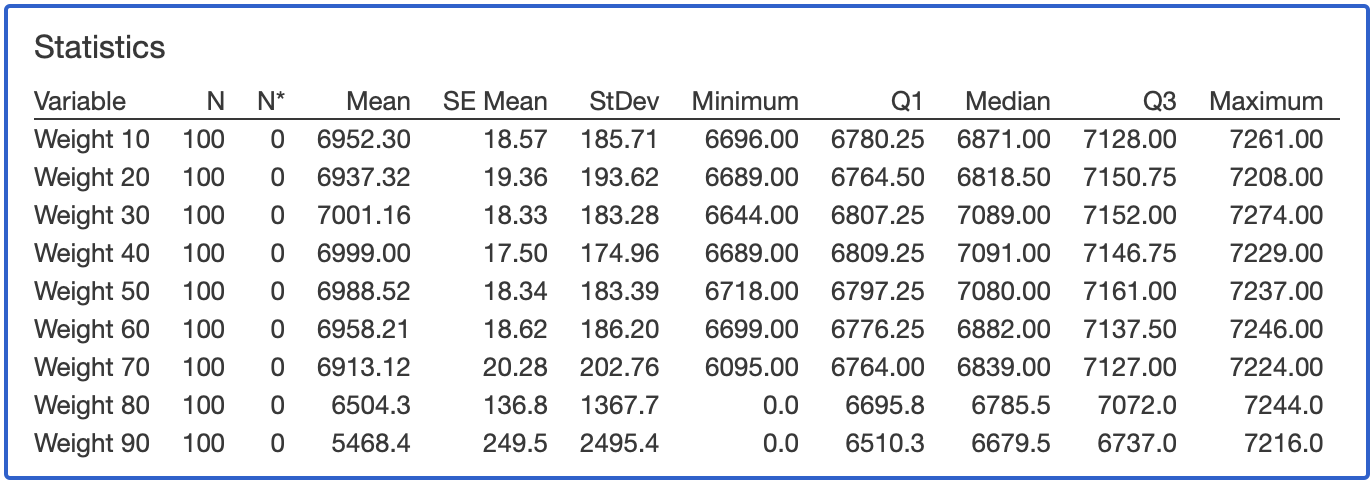

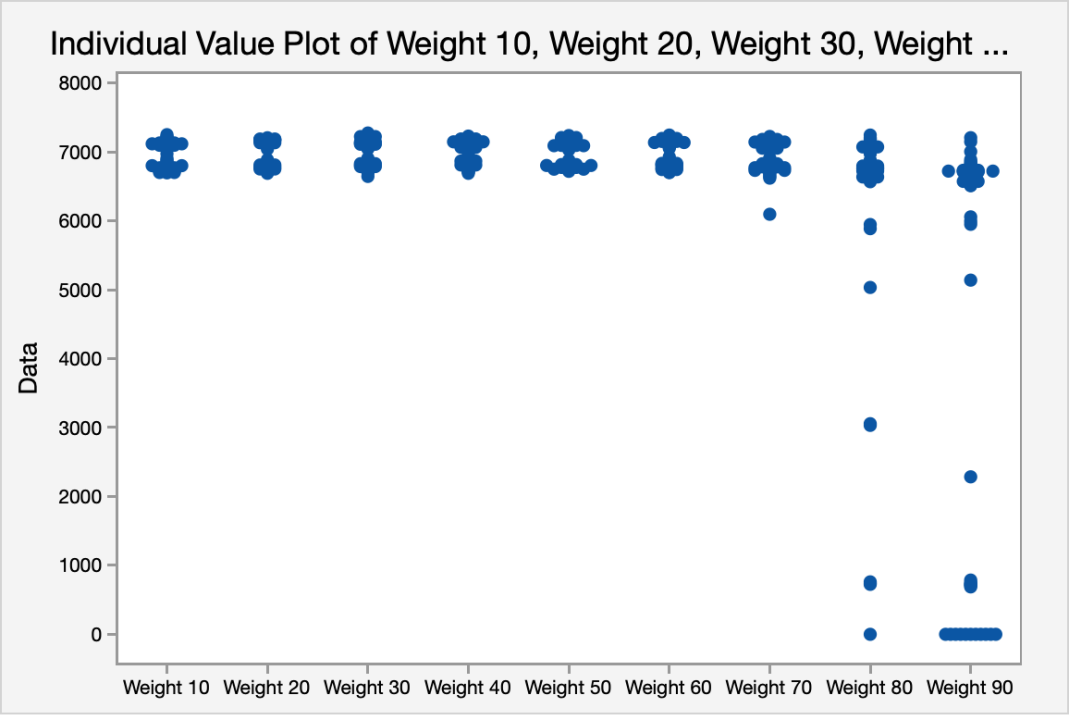

First, let's observe the scatter plot. We can see that the biggest difference from the previous climber algorithm is that there are not so many zeros and no obvious tailing phenomenon, which means that the probability that the backpack cannot accommodate is greatly reduced. At the same time, the values ​​of weight 10 to 60 are relatively close and there is no obvious decrease afterwards, which shows that this algorithm is more stable. Then we observe the statistics and we can see that when the weight is 30, the highest mean value is 7001.16, and its other results are also well , so we keep the result with weight 30。

The second step is to adjust the learning rate. Several commonly used values ​​are selected, including 0.01, 0.001, 0.1, 0.05 and 0.005. At the same time, other parameters are fixed to the default values ​​such as 01 weight 50 and epoch 100 to conduct the control variable method test. The evaluation results of the learning rate are as follows:

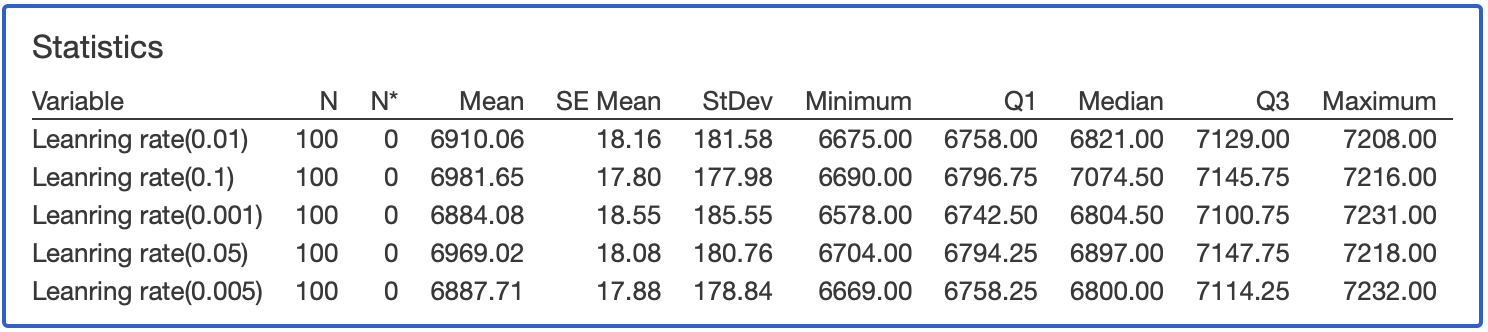

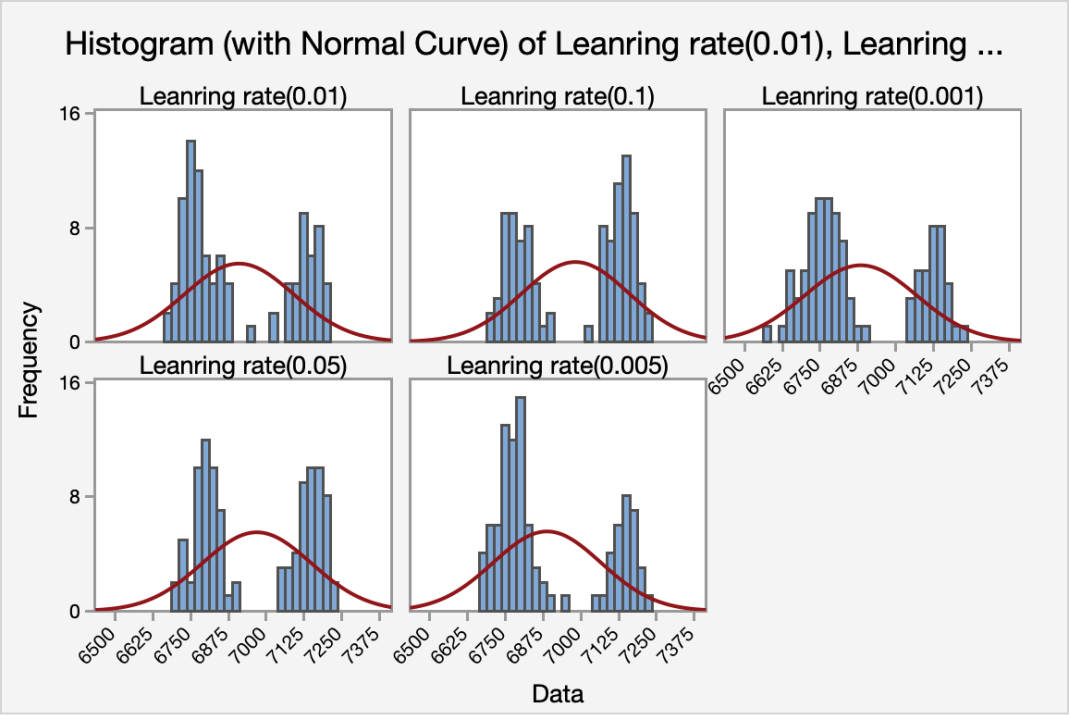

First, we can observe in the bar chart that the data distribution is the same as the twin towers. The left part is the part with lower values, and the right part is the part with higher values. Their heights are the corresponding numbers. That is to say, the higher the tower on the right, the better the result. So we initially choose a learning rate of 0.1. Then let us observe the results of statistics and find that the mean value of 0.1 is indeed higher than the others, and it also has advantages in the results of Q1 and Q2, so we keep the learning rate of 0.1.

The third step is to adjust the epoch based on the previous situation to observe the change in the backpack value from 100 to 1000 epochs. The results are as follows:

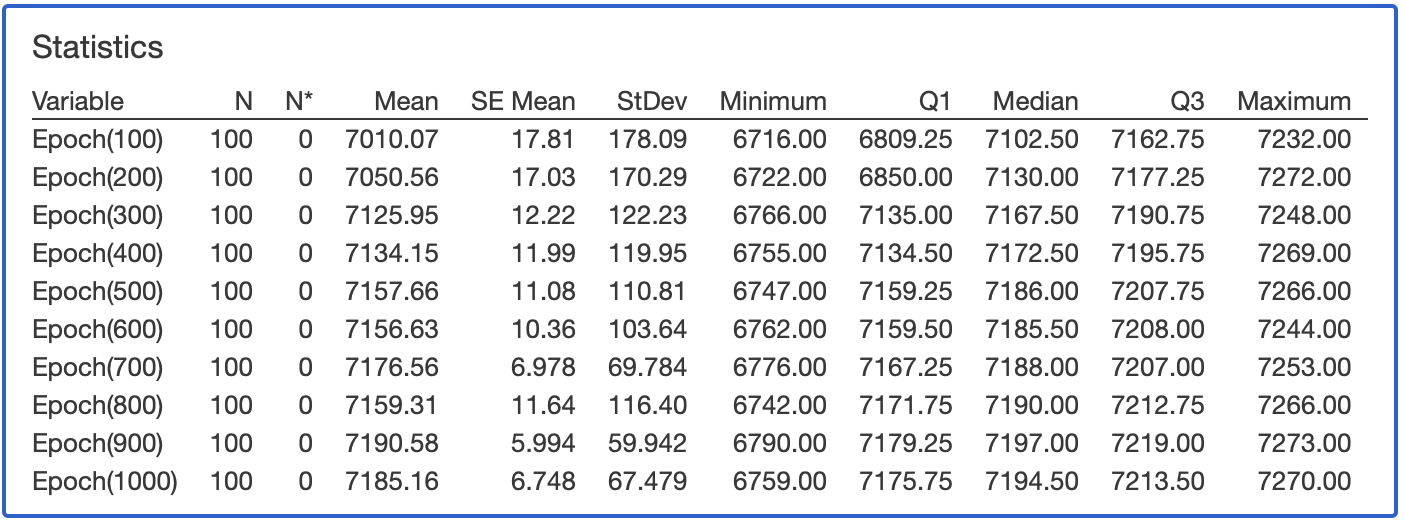

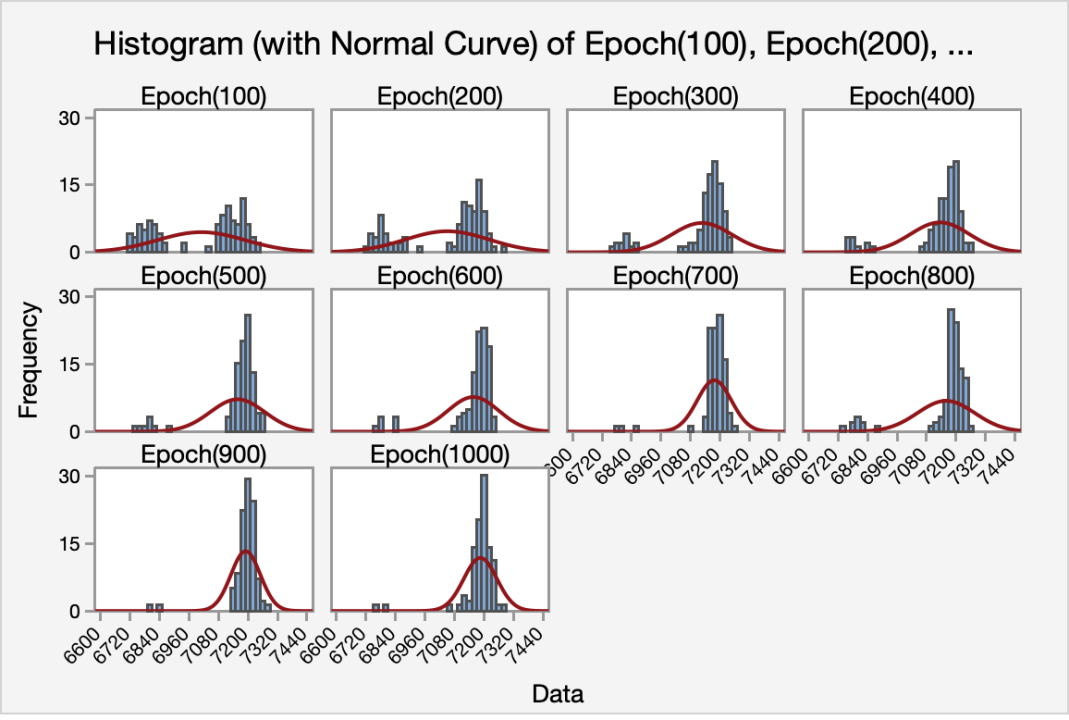

First, let's observe the histogram. We can see that as the number of epochs increases, the tower on the left of the twin towers begins to decrease but does not disappear completely. At the same time, the tower on the right begins to increase as the number of epochs increases. This shows that the results are getting better and better. Although there is still a little tailing, it accounts for a very small proportion. At the same time, let's observe the statistics results. We can see that our mean value exceeds 7100 and is very close to 7200. The maximum value has also reached 7273.

### 2.23 Algorithm Comparison ###

Now that the parameters of Algorithm T and Algorithm SCC have been roughly adjusted, we will start to compare the two algorithms.

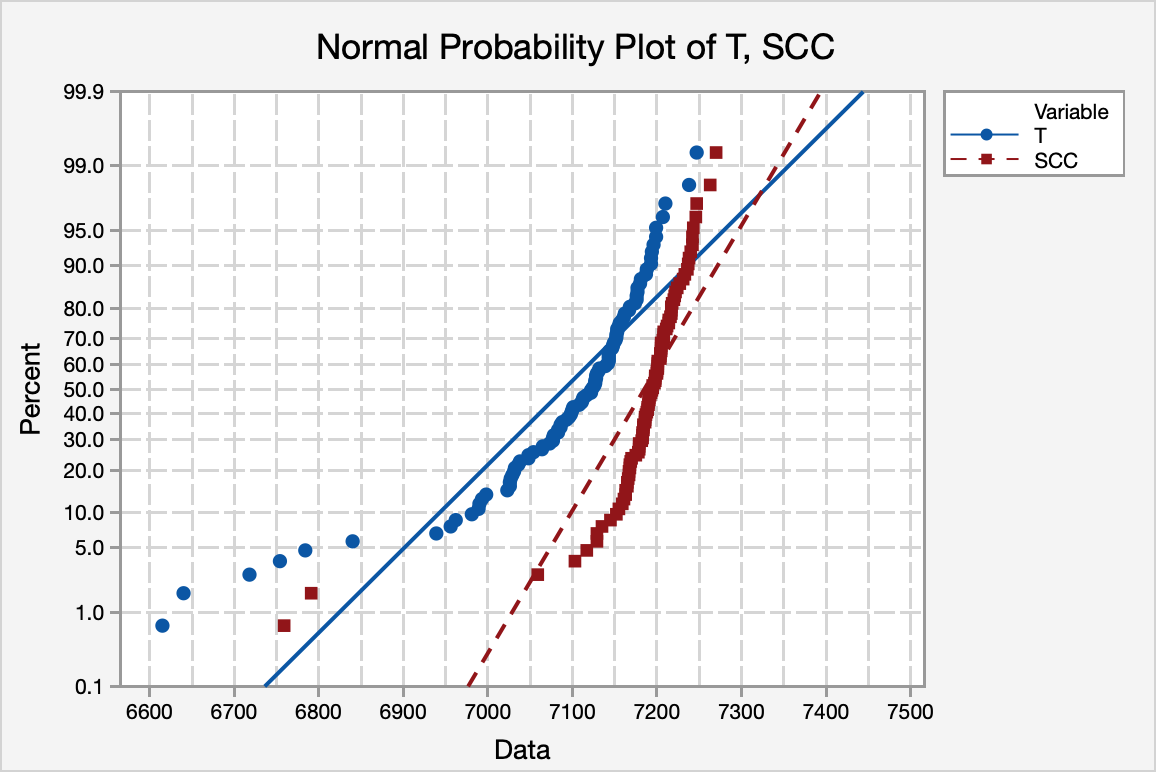

First is the normal probability plot. In this figure, we can see that the tail of algorithm T is more obvious, while the SCC algorithm has a tail but is much better than T. Then we can see that under the same probability, most of the SCC results are higher than the T results, so at this level, the SCC algorithm is better than the T algorithm.

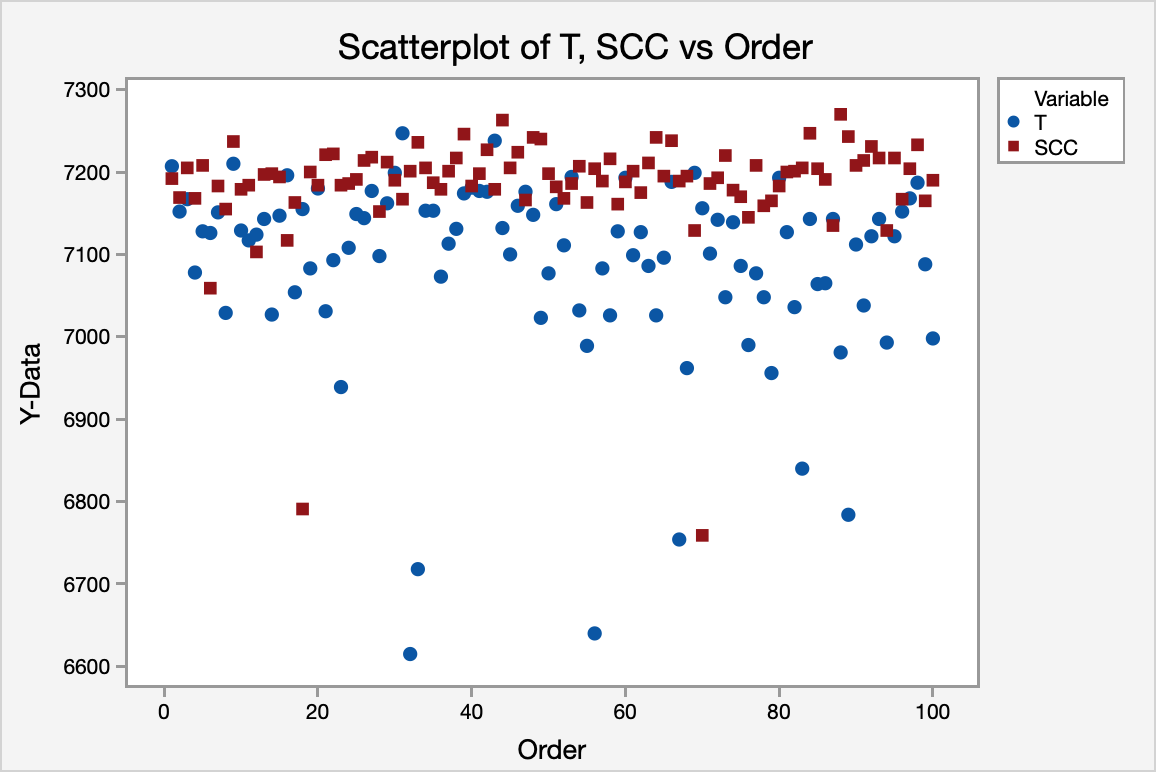

Next is the comparison of the scatter plots. It can be found that SCC is tighter, while T is looser. In other words, the results obtained by algorithm T are not as stable as those of algorithm SCC. SCC has fewer tailing data points than T, and the values ​​are not that low. So at this level, the SCC algorithm is better than the T algorithm.

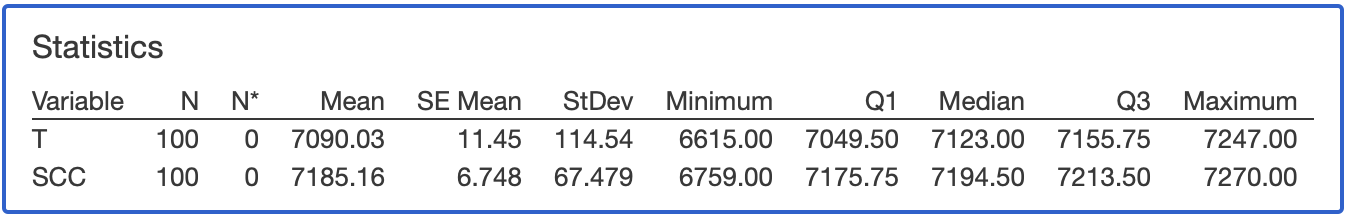

Finally, here are the statistics. In terms of mean value, SCC is 7185.16 and T is 7090.03; in terms of minimum, SCC is 6759 and T is 6615; in terms of Q1, Q2, and Q3, SCC is 7175.75, 7194.5, and 7213.5, respectively, and T is 7049.5, 7123, and 7155.75, respectively; in terms of maximum, SCC is 7270 and T is 7247. In summary, at this level, the SCC algorithm is better than the T algorithm.

After the above comparison, in this limited environment and background, the SCC algorithm is better than the T algorithm.

## 2.3 Implementation and parameter adjustment and comparison of another traditional algorithm ##

### 2.31 Genetic algorithm implementation and parameter adjustment ###

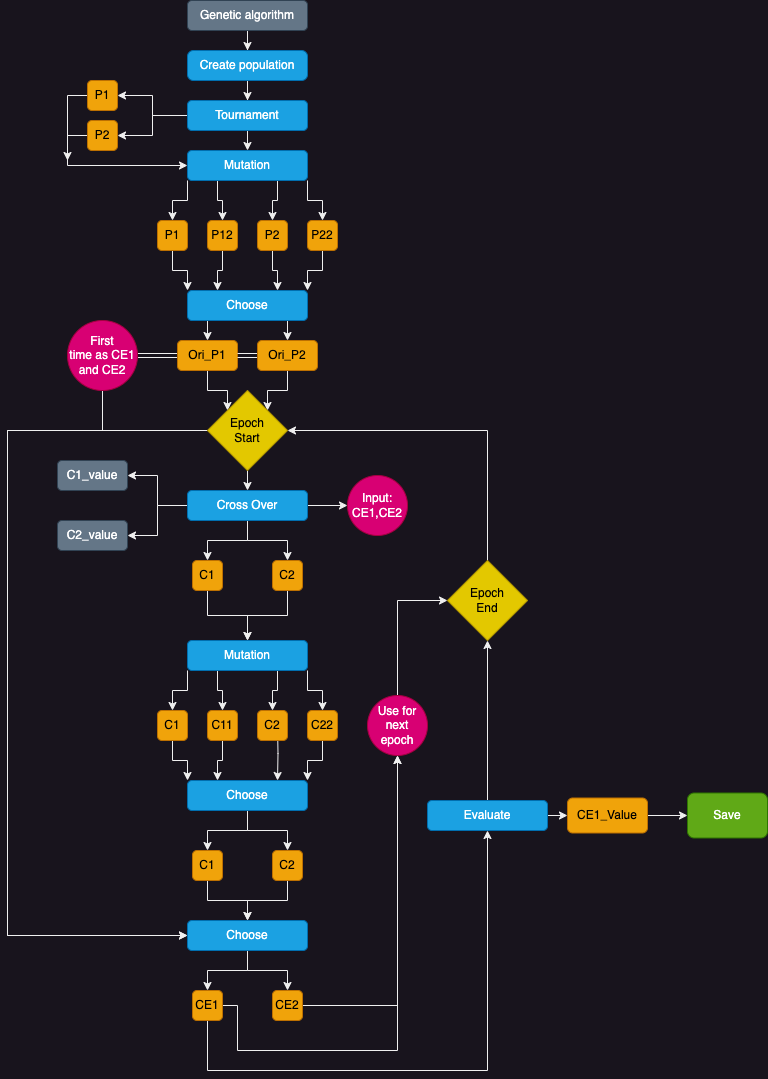

Now let's start the implementation of the genetic algorithm. First, we use the create population function. The purpose of this function is to generate a large enough population, which contains a 01 array and its corresponding values. Then, the generated population is put into the tournament function. The purpose of this function is to select the best two reserve parents (P1, P2) from the population. The generated reserve parents enter the mutation function to obtain the second pair of reserve parents (P12, P22) after they have undergone partial mutation. Then, the four reserve parents are sent to the choose function, and the best two of them will become the first generation parents (Ori_p1, Ori_p2). Then, the iteration begins, and the process is to send CE1 and CE2 (the first time is Ori_p1 and Ori_p2) to the cross function. The over function performs random breakpoints and exchanges to obtain offspring (C1, C2). The offspring then mutate to obtain C1, C11, C2, and C22. The four offspring are then sent to the choose function to obtain the two best offspring. The two offspring and the previous CE1 and CE2 then enter the choose function again to obtain the new CE1 and CE2.

Most of the evaluation functions are the same as before, so we will not set them up here. In the future, we will only discuss the newly defined functions of the genetic algorithm. The create_individual function generates a new individual with a weight of 01, and the create_population function generates a population based on the create_individual function.

In [22]:
def create_individual(x1,x2):
    '''
        Creates an individual as a list of two elements: solution and its fitness
    '''
    sol = random_s(x1,x2,n) 
    w,fit= evaluate(sol,res,profits,m,n)
    return [sol, fit]


def create_population(x1,x2,pop_size):
    '''
        Creates an initial population of pop_size randomly generated individuals
        Input:  an integer indicating the population size
        Output: a data structure for the population sorted by fitness
    '''
    pop = [create_individual(x1,x2) for i in range(pop_size)]
    pop.sort(key = lambda x: x[1])  #key is set to sort using second element (Fitness) 
    return pop

The mutation function takes an individual as input and mutates it, that is, transforms one point in it from 0 to 1 (if it was originally 0, it becomes 1, and if it was originally 1, it becomes 0)

In [23]:
def mutation(sol):   
    ''' Generate a random 1-bit flip mutant of the given solution
        Input:  Solution as binary list
        Output: Mutated solution
    '''    
    mutant = sol.copy()                     # copy solution
    i = random.randint(0,n-1)
    mutant[i] = 0 if mutant[i]== 1 else 1  # alter position i if 0 assign 1,else assign 1
    return mutant

The tournament function is to select the best two individuals from two random populations through mutation.

In [24]:
def tournament(pop):
    ''' Compares the fitness of two randomly selected individuals in the population and returns 
        the best of the two
        Input:  the population data structure 
        ouptut: the solution (binary list) of the selected individual
    '''
    # Add your code here
    random_number1 = random.sample(range(0,9),2)
    O_s1 = (pop[random_number1[0]])[0]
    O_s2 = (pop[random_number1[1]])[0]
    O_s11= mutation(O_s1)
    O_s21 = mutation(O_s2)
    
    WO_s11,EO_s11 = evaluate(O_s11,res,profits,m,n)
    WO_s21,EO_s21= evaluate(O_s21,res,profits,m,n)
    S11 = [O_s11,EO_s11]
    S21 =[O_s21,EO_s21]
    
    Group = [pop[random_number1[0]],pop[random_number1[1]],S11,S21]
    Group.sort(key = lambda x: x[1])
    # print(Group)
    sol=[Group[2],Group[3]]
    sol1 = Group[2][0]
    sol2 = Group[3][0]
    return sol1,sol2




The Crossover function first randomly selects a point, then disconnects the two input arrays at this position, and then cross-connects them to obtain new offspring.

In [25]:
def crossover(p1, p2):  
    ''' Performs a 1-point crossover of the two given solutions
        Input:  Two solutions (binary lists) as parents
        Ouptut: One child applying one-point crossover.
    '''
     # Add your code here
    random_number = random.sample(range(1,19),1)[0]
    child1 = []
    child2 = []
    # print("breakpoint is ",random_number)
    
    i = 0 
    while i < n:
        while i < random_number:
            child1.append(p1[i])
            i += 1
        child1.append(p2[i])
        i += 1
        
    i = 0 
    while i < n:
        while i < random_number:
            child2.append(p2[i])
            i += 1
        child2.append(p1[i])
        i += 1
        
    child1_value = evaluate(child1,res,profits,m,n)[1]
    child2_value = evaluate(child2,res,profits,m,n)[1]
    
    # child1.append(child1_value)
    # child2.append(child2_value)
    
    #print(child1_value,child2_value)
    return child1,child2,child1_value,child2_value

The Choose function needs to input 4 arrays to start, then it will get their values ​​through the evaluate function and sort them accordingly, and then use the two outputs with the highest values ​​as the new parents.

In [26]:
def choose(l1,l2,l3,l4):
   
    results = [
        (evaluate(l1,res,profits,m,n)[1], l1),  
        (evaluate(l2,res,profits,m,n)[1], l2),
        (evaluate(l3,res,profits,m,n)[1], l3),
        (evaluate(l4,res,profits,m,n)[1], l4),
    ]
    
    results.sort(key=lambda x: x[0], reverse=True)
    
    p1 = results[0][1]
    p2 = results[1][1]
    return p1 , p2

    

Then we start the formal genetic algorithm, as shown in the framework diagram at the beginning.

In [27]:
# pop_size = 10   # Define the population size

def genetic_algorithm(maxiter,pop_size,x1,x2):
    ''' 
       Run the GA for for a maximum number of iterations
       Input:  Integer representing the maximum number of iterations
       Output: The best solution found at the end of the run, 
               A trace of the values (fitness) of the best individual at each iteration
    '''   
    # Add your code here
    i = 0
    trace = []
    pop = create_population(x1,x2,pop_size)
    p1,p2 = tournament(pop)
    p12 = mutation(p1)
    p22 = mutation(p2)
    Ori_p1 , Ori_p2 = choose(p1,p2,p12,p22)
    # print(Ori_p1 , Ori_p2 )
    ce1,ce2 = Ori_p1,Ori_p2
                     
    while i < maxiter:
        c1,c2,c1_value,c2_value = crossover(ce1,ce2)
        c11 = mutation(c1)
        c21 = mutation(c2)
        c1,c2 = choose(c1,c2,c11,c21)
        # print(c1,c2)
        ce1,ce2 = choose(ce1,ce2,c1,c2)
        
        ce1_value = evaluate(ce1,res,profits,m,n)[1]
        trace.append(ce1_value)
        # print(ce1,ce2)
        i += 1
    
    max_value = max(trace)
    # print(trace)
    
    return max_value,trace
    

In [29]:
data_file_name = "multi_knap_n200_m25.txt"        

n, m, profits, res, cap = read_multi_knapsack(data_file_name)

print("Instance Data:")
print(f"n: {n}.  m: {m}")
print(f"Profits: {profits}")
print(f"Resources: {res}")
print(f"Capacities: {cap}")

Instance Data:
n: 200.  m: 25
Profits: [ 51  79  73  70  53  53  51  84  72  68  89  65  62  96  76  78  94  63
  82  61  66  55  60  63  50  63  91  65  64  55  80  74  95  96  56  90
  91  60  59  68  80  82 100  70  52  79  62  51  78  95  56  81  75  50
  80  84  83  92  54  72  57  87  84  53  94  75  79  63  84  57  60  92
  92  60  53  72  82  69  84  88  58  70  85  82  55  60  93  87  95  81
  67  53  65  76  69  92  71  76  76  61  75  70  91  95  60  70  50  91
  65  60  98  55  84  75  84  94  63  98  78  64  85  53  79  65  66  99
  77  75  78  71  90  56  98  65  75  85  90  54  68  54  65  95  83  64
  87  63  79  83  70  61  80  51  93  55  62  63  83 100  75  55  91  53
  79  71  61  91  76  50  93  89  57  77  60  60  54  93  53  70  69  74
  84  82  75  90  66  70  95  91 100  98  51  71  54  87  67  73  65  80
  74  56]
Resources: [[ 9  8 11 ... 13 14  6]
 [ 9  8 15 ...  9 15 11]
 [ 5  8 12 ...  8 11  6]
 ...
 [ 8 14  9 ... 10 13  7]
 [ 6 11  9 ... 14  9  8]
 [ 6  8

In [30]:
max_value,trace = genetic_algorithm(100,30,90,10)
print(max_value)

7132


The following is the code used for parameter adjustment. If you are interested, you can experience it by unpacking the comments.

In [32]:
# i = 0
# while i < 100:
#     max_value,trace = genetic_algorithm(1000,100,80,20)
#     print(max_value)
    
#     i += 1
    
# print("train over")

### 2.32 Parameter Adjustment ###

The first step is to test the 01 weight by the control variable method while retaining the previous results. The parameters used are changed from 10-90 to 90-10, so as to find the local optimal weight. The results are as follows:

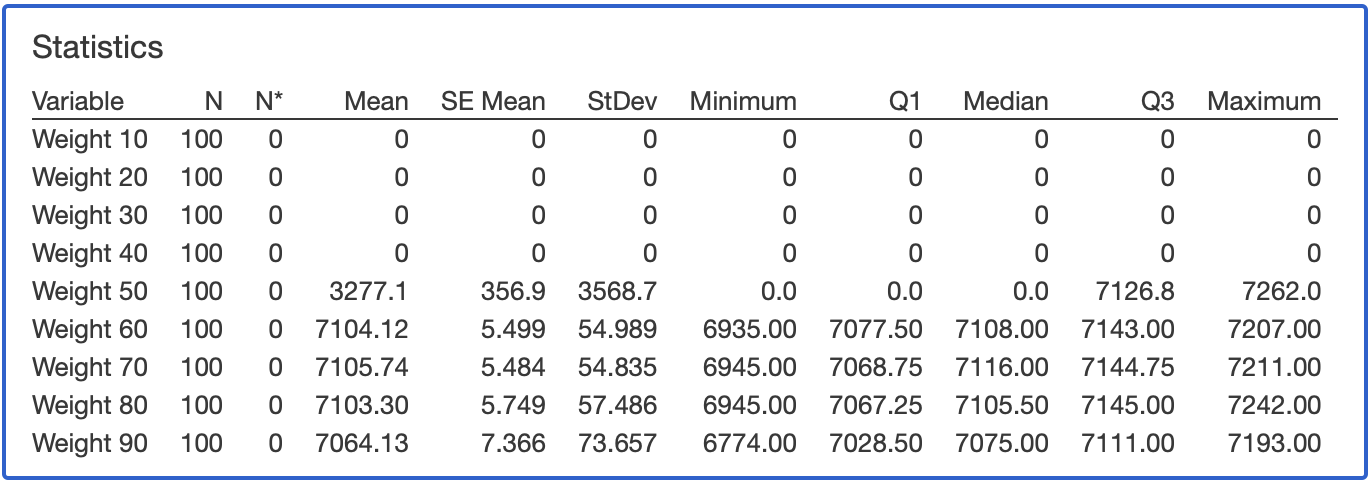

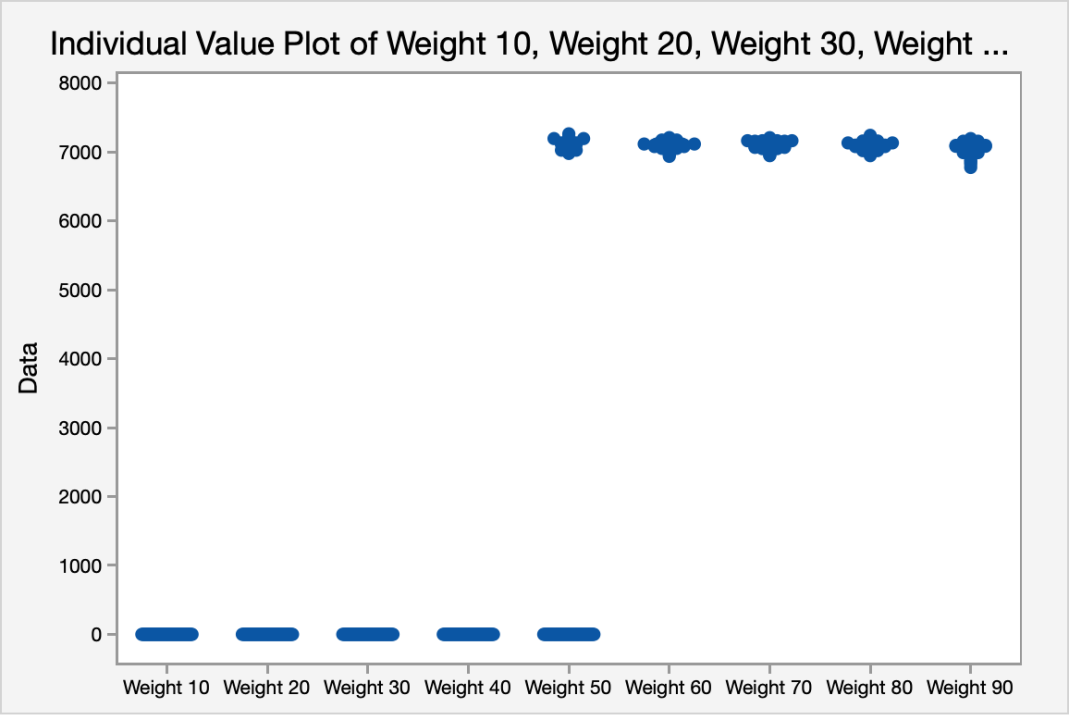

First, let's observe the individual value plot. We can see that before weight 50, they are basically all 0. After weight 50, non-0 values ​​begin to appear. After weight 50, there is no 0. The results begin to condense, so the best weight should be selected after 60. Then let's observe the statistics. We can see that when weight is 60, 70, and 80, the mean value is very close, with a difference of only about 1. So in order to get a better result, we select a weight 80 with the largest maximum value from 60 to 80 as the retained result.

In the second step, while retaining the previous results, the control variable method is used to adjust the population size parameters to find the local optimal population size. The results are as follows:

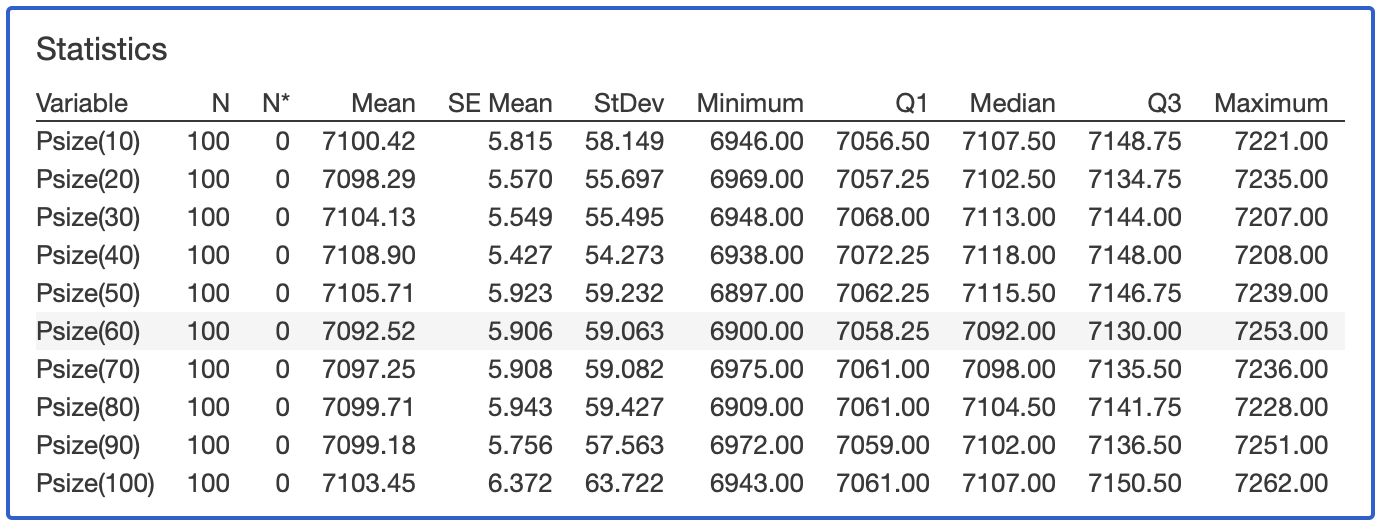

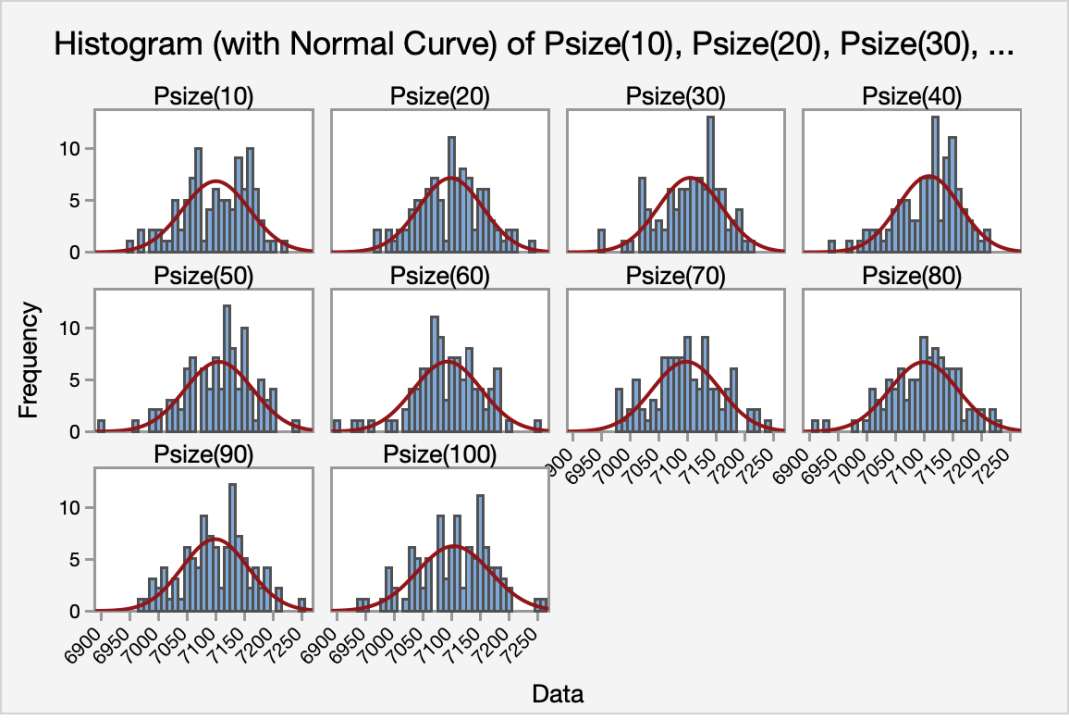

First, we observed the histogram and found that the trend and distribution did not have a big difference, nor could we clearly select a better solution. Then, we observed the statistics and found that the mean value results were almost very close, which raised the question of whether the population size had an impact on the results. So we did a one way anova test to verify the results. The results are as follows:

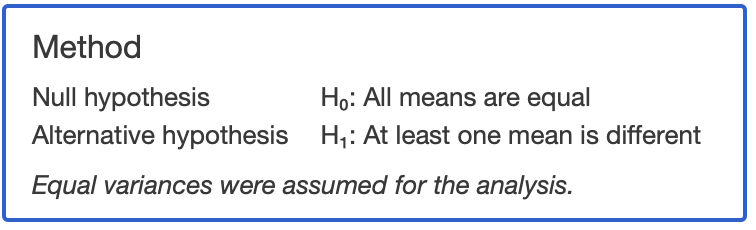

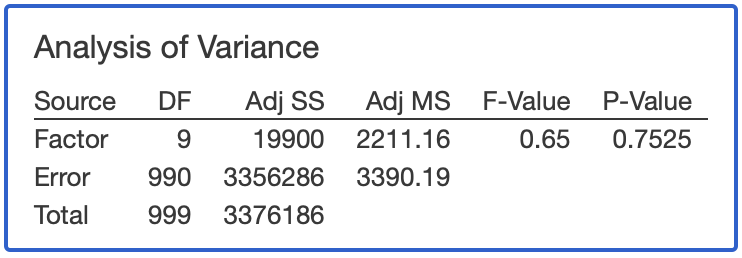

According to the results, P-value = 0.7525 > 0.05, F-value = 0.65, so reject H0 and accept H1, and conclude that ‘population size has no effect on the results’, so choose Psize (100) with the largest maximum value as the retained result.

The third step is to adjust the epoch based on the previous situation to observe the change in the backpack value from 100 to 1000 epochs. The results are as follows:

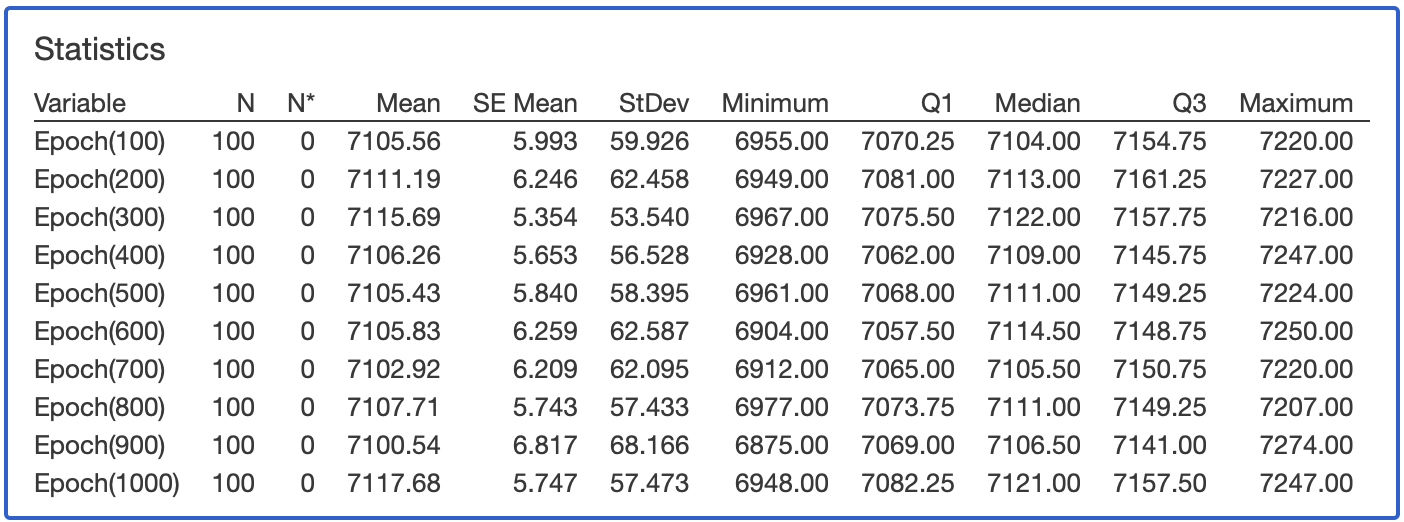

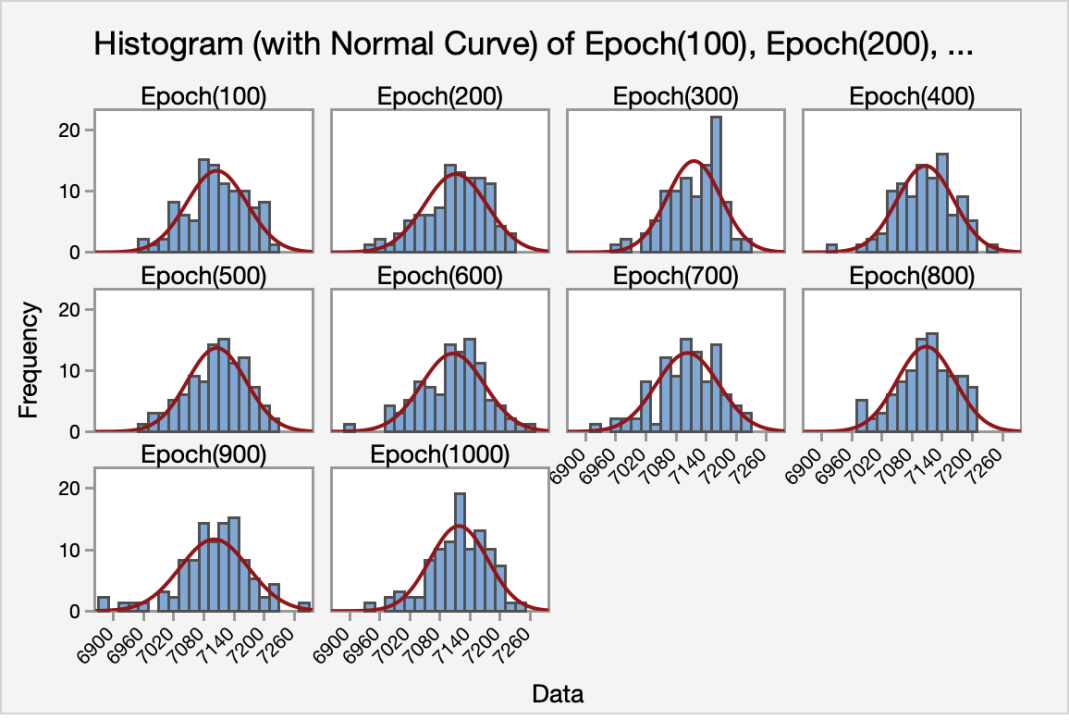

First, let us observe the histogram. We can find that the impact of epoch changes on the genetic algorithm is not as great as SCC, but it is relatively stable and has almost no tailing phenomenon. Then let us observe the statistics and find that the mean value changes from 7105.56 to 7117.68, and the maximum value changes from 7220 to 7247 (the highest is 7274).

### 2.33 Algorithm Comparison ###

Now let's compare the three existing algorithms. The results are as follows:

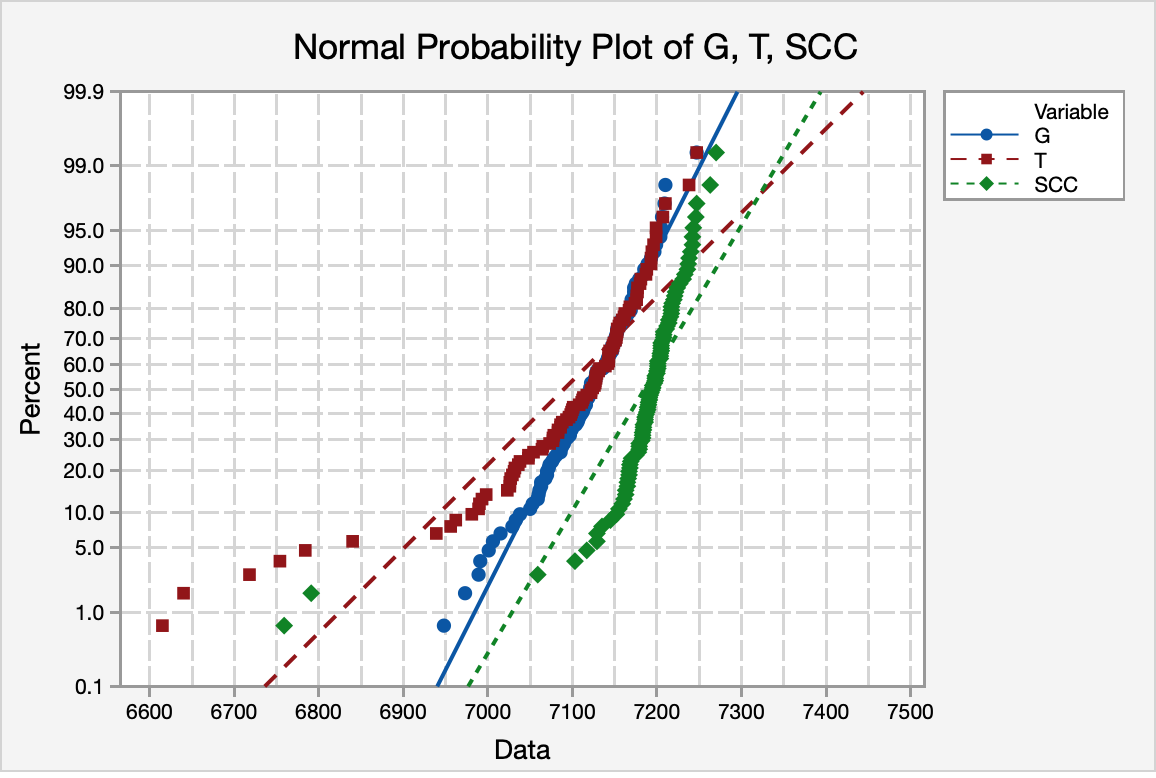

First, let's observe the normal probability plot. It is obvious that the genetic algorithm (hereinafter referred to as G) and T are basically the same in the latter part, but the front part of G is better than the front part of T. However, if compared with the SCC algorithm, it can be found that except for the front part which is slightly better than the tail of SCC, the other parts are not as good as the SCC algorithm, but compared with T, G is still good.

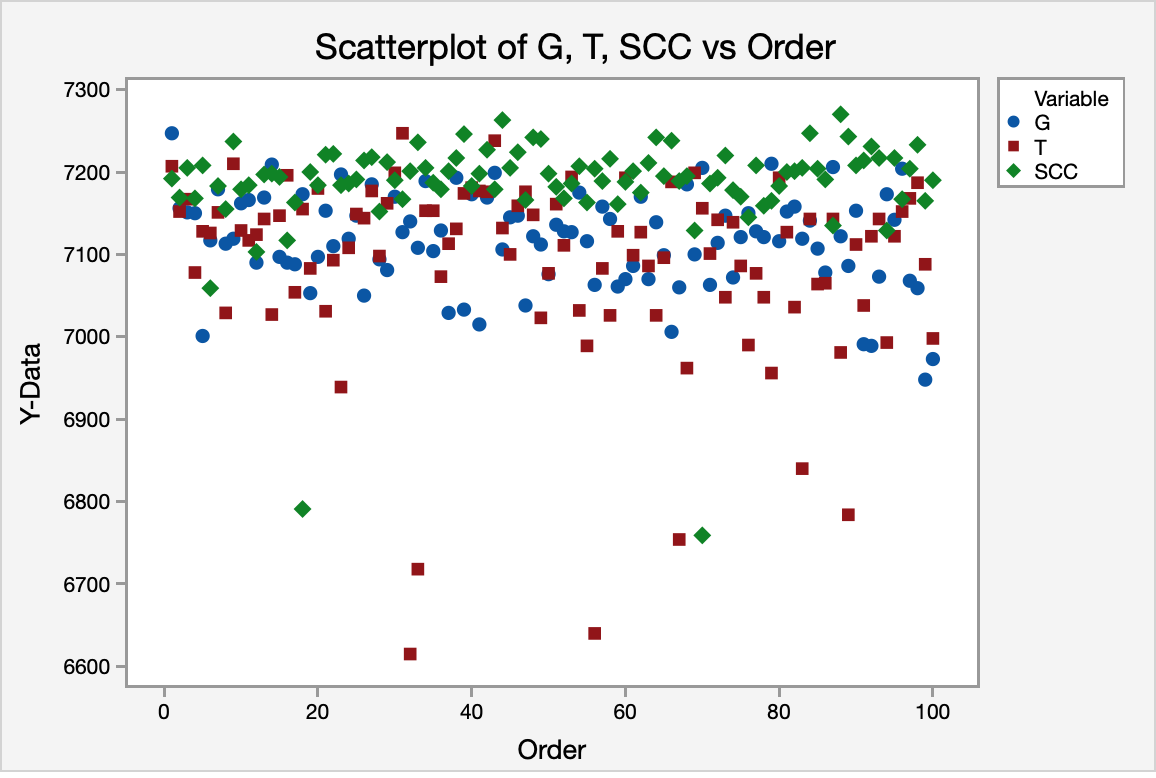

Then let's observe the scatter plot and find that G is tighter than T and there is no tailing below, so G is still better than T. If G is compared with SCC, SCC is still better because SCC is tighter and most of the values ​​are higher.

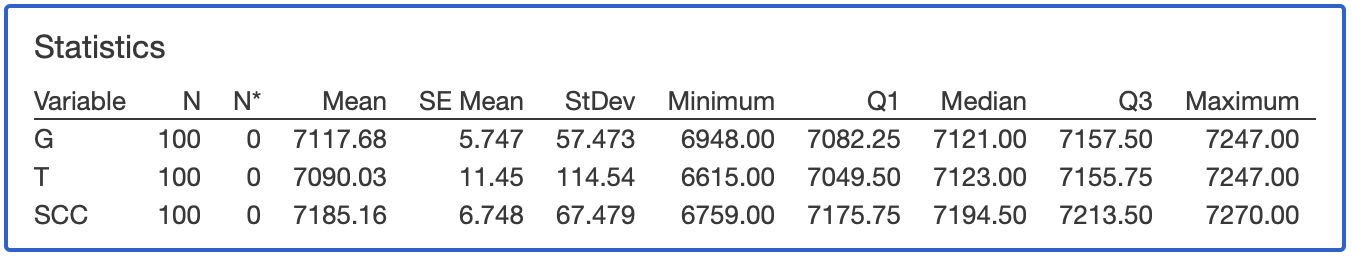

Finally, let us observe the statistics. In terms of mean value, SCC is the best and G is the second. In terms of minimum value, G is the best and SCC is the second. In terms of maximum value, SCC is the best, and the other two algorithms are the same.

# 3 Conclusion #

## Conclusion,In this section, we created two algorithms, SCC and genetic algorithm, and then adjusted the parameters of the three algorithms respectively, and then compared their performance. Under the limited environment of the n200 data set, the SCC algorithm is obviously better than the other two algorithms, and then the G algorithm is slightly better than the T algorithm. The parameter adjustment does not mobilize all possible parameters. For example, the G algorithm can try to change one breakpoint in the cross over function to multiple breakpoints, and each parameter in the T algorithm may be more finely adjusted. However, under this limited condition, the SCC algorithm is indeed better. ##